In [1]:
"""
Look over results for all z bins

Author: Alan Nguyen

18-06-2020
"""

'\nLook over results for all z bins\n\nAuthor: Alan Nguyen\n\n18-06-2020\n'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table, Column
from scipy.optimize import curve_fit, leastsq
from astropy.cosmology import WMAP9 as cosmo
from astropy import units as u
import os
import math as m
from astropy import constants as const
import time
from BOSS_func_v9 import *
from general_functions_v1 import *

In [3]:
hdul = fits.open('AGN_results_files\zbin1_results_v2.fits')

zbin1_results = hdul[1].data

hdul.close()

##################################################################################

hdul = fits.open('AGN_results_files\zbin2_results_v2.fits')

zbin2_results = hdul[1].data

hdul.close()

##################################################################################

hdul = fits.open('AGN_results_files\zbin3_results_v2.fits')

zbin3_results = hdul[1].data

hdul.close()

##################################################################################

hdul = fits.open('AGN_results_files\zbin4_results_v2.fits')

zbin4_results = hdul[1].data

hdul.close()

In [4]:

select_zbin1_2g = (zbin1_results['FLAG'] == 2) | (zbin1_results['FLAG'] == 3) #2g is two gaussian 
select_zbin2_2g = (zbin2_results['FLAG'] == 2) | (zbin2_results['FLAG'] == 3) #2g is two gaussian 
select_zbin3_2g = (zbin3_results['FLAG'] == 2) | (zbin3_results['FLAG'] == 3) #2g is two gaussian 
select_zbin4_2g = (zbin4_results['FLAG'] == 2) | (zbin4_results['FLAG'] == 3) #2g is two gaussian

##################################################################################

zbin1_2g = zbin1_results[select_zbin1_2g]
zbin2_2g = zbin2_results[select_zbin2_2g]
zbin3_2g = zbin3_results[select_zbin3_2g]
zbin4_2g = zbin4_results[select_zbin4_2g]

##################################################################################

zbin1_wing_veldis = zbin1_2g['WING_VELDIS']
zbin2_wing_veldis = zbin2_2g['WING_VELDIS']
zbin3_wing_veldis = zbin3_2g['WING_VELDIS']
zbin4_wing_veldis = zbin4_2g['WING_VELDIS']


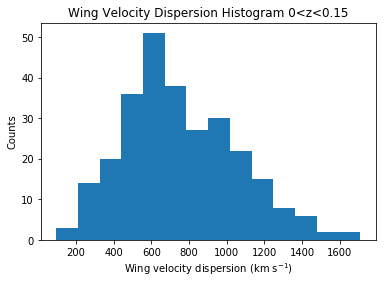

             Count:   274
              Mean:   756.9525982921365
            Median:   714.1771783229522
Standard Deviation:   300.6758943519432
           Minimum:   94.85896612433184
           Maximum:   1709.1396427944985


In [5]:
plt.hist(zbin1_wing_veldis, bins = 14)

plt.xlabel(r'Wing velocity dispersion (km s$^{-1}$)')
plt.ylabel('Counts')
plt.title('Wing Velocity Dispersion Histogram 0<z<0.15')

# plt.savefig('zbin1_wingveldis_hist.png')

plt.show()

array_summary(zbin1_wing_veldis)

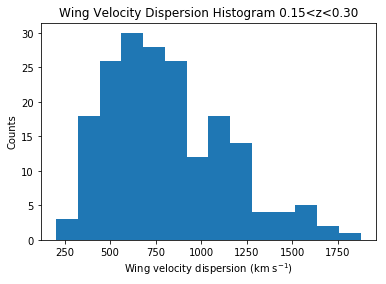

             Count:   191
              Mean:   811.5744861898254
            Median:   760.6186897470266
Standard Deviation:   320.81020930533055
           Minimum:   204.15080141133134
           Maximum:   1873.2715331848556


In [6]:
plt.hist(zbin2_wing_veldis, bins = 14)

plt.xlabel(r'Wing velocity dispersion (km s$^{-1}$)')
plt.ylabel('Counts')
plt.title('Wing Velocity Dispersion Histogram 0.15<z<0.30')

# plt.savefig('zbin2_wingveldis_hist.png')

plt.show()
array_summary(zbin2_wing_veldis)

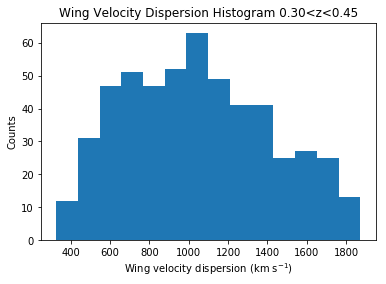

             Count:   524
              Mean:   1047.395774022505
            Median:   1020.9485693897971
Standard Deviation:   368.8924521433099
           Minimum:   326.1515116379908
           Maximum:   1872.6837528586398


In [7]:
plt.hist(zbin3_wing_veldis, bins = 14)

plt.xlabel(r'Wing velocity dispersion (km s$^{-1}$)')
plt.ylabel('Counts')
plt.title('Wing Velocity Dispersion Histogram 0.30<z<0.45')

# plt.savefig('zbin3_wingveldis_hist.png')

plt.show()

array_summary(zbin3_wing_veldis)

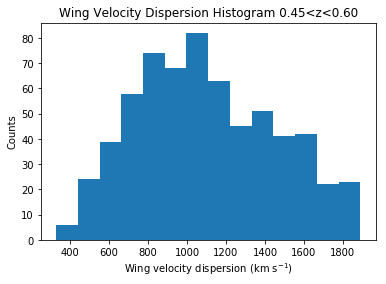

             Count:   638
              Mean:   1101.7339457597134
            Median:   1067.963748879279
Standard Deviation:   354.8845584272911
           Minimum:   328.0543957096914
           Maximum:   1889.794673370376


In [8]:
plt.hist(zbin4_wing_veldis, bins = 14)

plt.xlabel(r'Wing velocity dispersion (km s$^{-1}$)')
plt.ylabel('Counts')
plt.title('Wing Velocity Dispersion Histogram 0.45<z<0.60')

# plt.savefig('zbin4_wingveldis_hist.png')

plt.show()

array_summary(zbin4_wing_veldis)

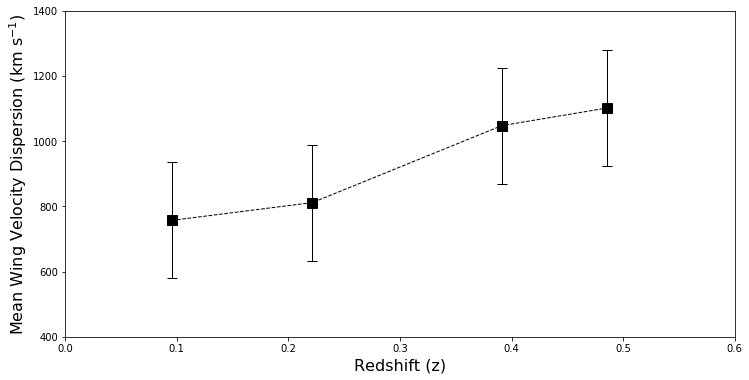

In [9]:
fig = plt.figure(figsize=(12,6))

plot_xaxis = np.array([0.09548108, 0.22160242, 0.39126638, 0.48597243]) #average z
plot_yaxis_1 = np.array([np.mean(zbin1_wing_veldis), np.mean(zbin2_wing_veldis), np.mean(zbin3_wing_veldis), np.mean(zbin4_wing_veldis)])
# plot_yaxis_2 = np.array([np.median(zbin1_wing_veldis), np.median(zbin2_wing_veldis), np.median(zbin3_wing_veldis), np.median(zbin4_wing_veldis)])
plot_yerror = np.std([np.mean(zbin1_wing_veldis), np.std(zbin2_wing_veldis), np.std(zbin3_wing_veldis), np.std(zbin4_wing_veldis)])

plt.errorbar(plot_xaxis, plot_yaxis_1, plot_yerror, color = 'black', linewidth = 1, linestyle = '--', marker = 's', ms = 10, capsize = 5)

plt.ylim(400, 1400)
plt.xlim(0, 0.6)

plt.xlabel('Redshift (z)', fontsize = 16)
plt.ylabel(r'Mean Wing Velocity Dispersion (km s$^{-1}$)', fontsize = 16)

# plt.savefig('MeanWing_veldis_z.png')

plt.show()

In [10]:
#make pie charts
zbin1_flags = zbin1_results['FLAG']
zbin2_flags = zbin2_results['FLAG']
zbin3_flags = zbin3_results['FLAG']
zbin4_flags = zbin4_results['FLAG']

unique, counts = np.unique(zbin1_flags, return_counts=True) #count occurences of each flag
zbin1_class = dict(zip(unique, counts)) #put into dictionary

unique, counts = np.unique(zbin2_flags, return_counts=True) #count occurences of each flag
zbin2_class = dict(zip(unique, counts)) #put into dictionary

unique, counts = np.unique(zbin3_flags, return_counts=True) #count occurences of each flag
zbin3_class = dict(zip(unique, counts)) #put into dictionary

unique, counts = np.unique(zbin4_flags, return_counts=True) #count occurences of each flag
zbin4_class = dict(zip(unique, counts)) #put into dictionary

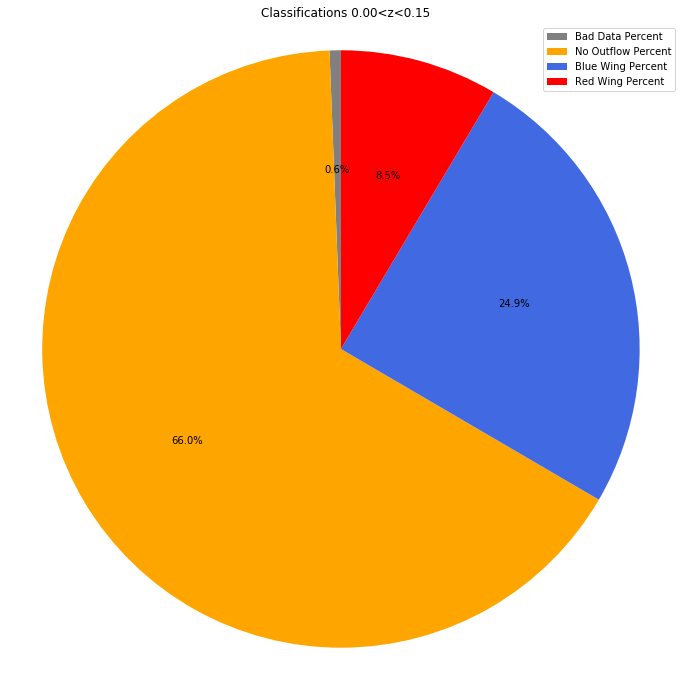

In [11]:
zbin1_bad = (100 * zbin1_class[0]) / len(zbin1_results)
zbin1_noo = (100 * (zbin1_class[1] + zbin1_class[4])) / len(zbin1_results)
zbin1_blu = (100 * zbin1_class[2]) / len(zbin1_results)
zbin1_red = (100 * zbin1_class[3]) / len(zbin1_results)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Bad Data Percent', 'No Outflow Percent', 'Blue Wing Percent', 'Red Wing Percent'
sizes = [zbin1_bad, zbin1_noo, zbin1_blu, zbin1_red]

fig1, ax1 = plt.subplots(figsize = (12,12))

ax1.pie(sizes, autopct='%1.1f%%',
        startangle=90, colors = ('grey', 'orange', 'royalblue', 'red', 'green'), explode = [0, 0, 0, 0])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc = 1, labels = labels)

plt.title('Classifications 0.00<z<0.15')
# plt.savefig('zbin1_classification_pie.png')

plt.show()

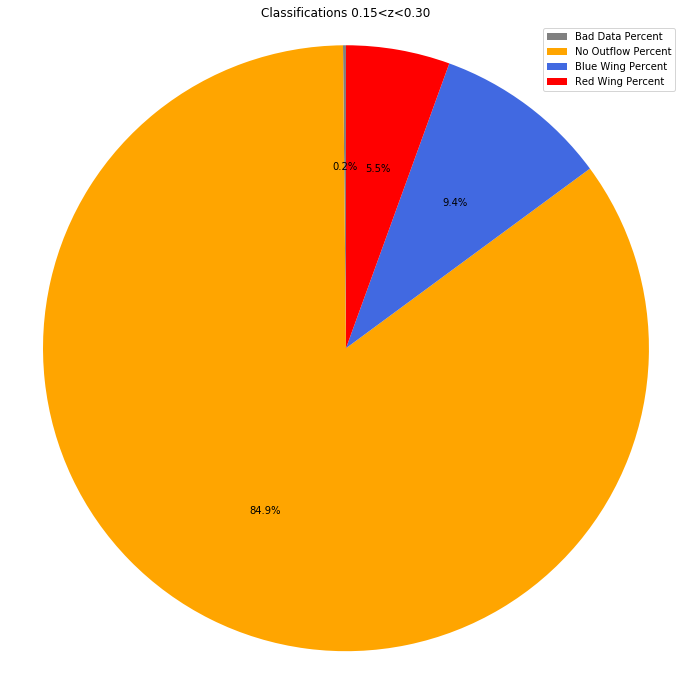

In [12]:
zbin2_bad = (100 * zbin2_class[0]) / len(zbin2_results)
zbin2_noo = (100 * (zbin2_class[1] + zbin2_class[4])) / len(zbin2_results)
zbin2_blu = (100 * zbin2_class[2]) / len(zbin2_results)
zbin2_red = (100 * zbin2_class[3]) / len(zbin2_results)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Bad Data Percent', 'No Outflow Percent', 'Blue Wing Percent', 'Red Wing Percent'
sizes = [zbin2_bad, zbin2_noo, zbin2_blu, zbin2_red]

fig1, ax1 = plt.subplots(figsize = (12,12))

ax1.pie(sizes, autopct='%1.1f%%',
        startangle=90, colors = ('grey', 'orange', 'royalblue', 'red', 'green'), explode = [0, 0, 0, 0])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc = 1, labels = labels)

plt.title('Classifications 0.15<z<0.30')
# plt.savefig('zbin2_classification_pie.png')

plt.show()

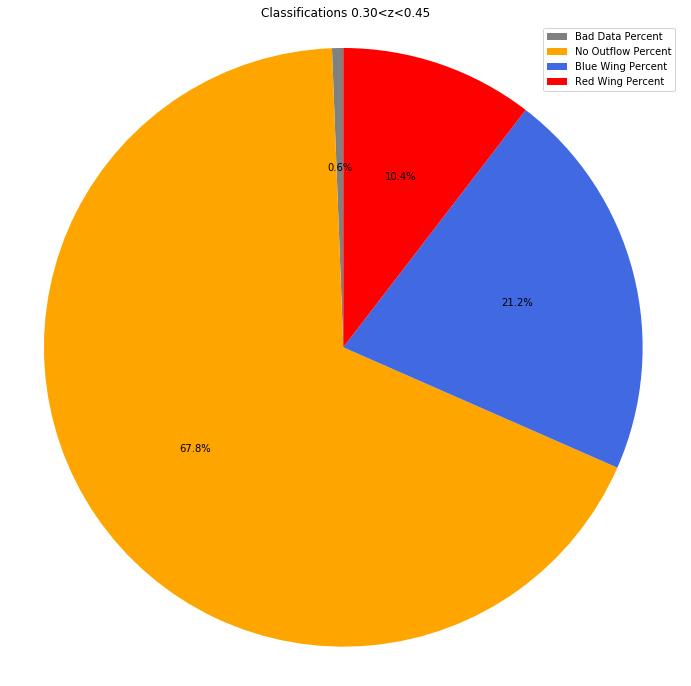

In [13]:
zbin3_bad = (100 * zbin3_class[0]) / len(zbin3_results)
zbin3_noo = (100 * (zbin3_class[1] + zbin3_class[4])) / len(zbin3_results)
zbin3_blu = (100 * zbin3_class[2]) / len(zbin3_results)
zbin3_red = (100 * zbin3_class[3]) / len(zbin3_results)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Bad Data Percent', 'No Outflow Percent', 'Blue Wing Percent', 'Red Wing Percent'
sizes = [zbin3_bad, zbin3_noo, zbin3_blu, zbin3_red]

fig1, ax1 = plt.subplots(figsize = (12,12))

ax1.pie(sizes, autopct='%1.1f%%',
        startangle=90, colors = ('grey', 'orange', 'royalblue', 'red', 'green'), explode = [0, 0, 0, 0])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc = 1, labels = labels)

plt.title('Classifications 0.30<z<0.45')
# plt.savefig('zbin3_classification_pie.png')

plt.show()

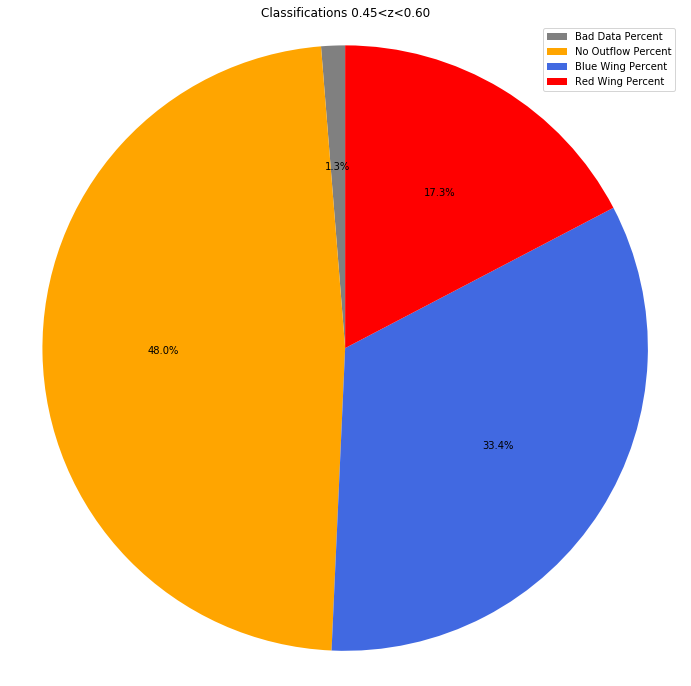

In [14]:
zbin4_bad = (100 * zbin4_class[0]) / len(zbin4_results)
zbin4_noo = (100 * (zbin4_class[1] + zbin4_class[4])) / len(zbin4_results)
zbin4_blu = (100 * zbin4_class[2]) / len(zbin4_results)
zbin4_red = (100 * zbin4_class[3]) / len(zbin4_results)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Bad Data Percent', 'No Outflow Percent', 'Blue Wing Percent', 'Red Wing Percent'
sizes = [zbin4_bad, zbin4_noo, zbin4_blu, zbin4_red]

fig1, ax1 = plt.subplots(figsize = (12,12))

# fig1.set_size_inches(10,10) 

ax1.pie(sizes, autopct='%1.1f%%',
        startangle=90, colors = ('grey', 'orange', 'royalblue', 'red', 'green'), explode = [0, 0, 0, 0])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc = 1, labels = labels)

plt.title('Classifications 0.45<z<0.60')
# plt.savefig('zbin4_classification_pie.png')

plt.show()

In [15]:
#here we reproduce woo et al fig 6
#need luminosity as well as vel shift

hdul = fits.open('AGN_zbin_fitsfiles\AGN_zbin1_v2.fits')

zbin1_data = hdul[1].data

hdul.close()

#########################################

hdul = fits.open('AGN_zbin_fitsfiles\AGN_zbin2_v2.fits')

zbin2_data = hdul[1].data

hdul.close()

#########################################

hdul = fits.open('AGN_zbin_fitsfiles\AGN_zbin3_v2.fits')

zbin3_data = hdul[1].data

hdul.close()

#########################################

hdul = fits.open('AGN_zbin_fitsfiles\AGN_zbin4_v2.fits')

zbin4_data = hdul[1].data

hdul.close()

##################################################################################

zbin1_OIII_flux = zbin1_data['FLUX'][:, 17]
zbin1_redshift  = zbin1_data['Z']

zbin2_OIII_flux = zbin2_data['FLUX'][:, 17]
zbin2_redshift  = zbin2_data['Z']

zbin3_OIII_flux = zbin3_data['FLUX'][:, 17]
zbin3_redshift  = zbin3_data['Z']

zbin4_OIII_flux = zbin4_data['FLUX'][:, 17]
zbin4_redshift  = zbin4_data['Z']

##################################################################################

zbin1_lum_dis = cosmo.luminosity_distance(zbin1_redshift)
zbin1_lum_dis = zbin1_lum_dis.to(u.cm)
zbin1_OIII_flux_correct_units = zbin1_OIII_flux * (10**(-17)) * (u.erg/(u.cm*u.cm*u.second))
zbin1_OIII_lum = 4 * np.pi * zbin1_OIII_flux_correct_units * (zbin1_lum_dis ** 2)

##################################################################################

zbin2_lum_dis = cosmo.luminosity_distance(zbin2_redshift)
zbin2_lum_dis = zbin2_lum_dis.to(u.cm)
zbin2_OIII_flux_correct_units = zbin2_OIII_flux * (10**(-17)) * (u.erg/(u.cm*u.cm*u.second))
zbin2_OIII_lum = 4 * np.pi * zbin2_OIII_flux_correct_units * (zbin2_lum_dis ** 2)

##################################################################################

zbin3_lum_dis = cosmo.luminosity_distance(zbin3_redshift)
zbin3_lum_dis = zbin3_lum_dis.to(u.cm)
zbin3_OIII_flux_correct_units = zbin3_OIII_flux * (10**(-17)) * (u.erg/(u.cm*u.cm*u.second))
zbin3_OIII_lum = 4 * np.pi * zbin3_OIII_flux_correct_units * (zbin3_lum_dis ** 2)

##################################################################################

zbin4_lum_dis = cosmo.luminosity_distance(zbin4_redshift)
zbin4_lum_dis = zbin4_lum_dis.to(u.cm)
zbin4_OIII_flux_correct_units = zbin4_OIII_flux * (10**(-17)) * (u.erg/(u.cm*u.cm*u.second))
zbin4_OIII_lum = 4 * np.pi * zbin4_OIII_flux_correct_units * (zbin4_lum_dis ** 2)

##################################################################################

zbin1_OIII_lum_array = np.array(zbin1_OIII_lum)
zbin2_OIII_lum_array = np.array(zbin2_OIII_lum)
zbin3_OIII_lum_array = np.array(zbin3_OIII_lum)
zbin4_OIII_lum_array = np.array(zbin4_OIII_lum)

##################################################################################

zbin1_OIII_lum_array = np.log10(zbin1_OIII_lum_array[select_zbin1_2g])
zbin2_OIII_lum_array = np.log10(zbin2_OIII_lum_array[select_zbin2_2g])
zbin3_OIII_lum_array = np.log10(zbin3_OIII_lum_array[select_zbin3_2g])
zbin4_OIII_lum_array = np.log10(zbin4_OIII_lum_array[select_zbin4_2g])

In [16]:
zbin1_velshift = zbin1_results['VELSHIFT'][select_zbin1_2g]
zbin2_velshift = zbin2_results['VELSHIFT'][select_zbin2_2g]
zbin3_velshift = zbin3_results['VELSHIFT'][select_zbin3_2g]
zbin4_velshift = zbin4_results['VELSHIFT'][select_zbin4_2g]

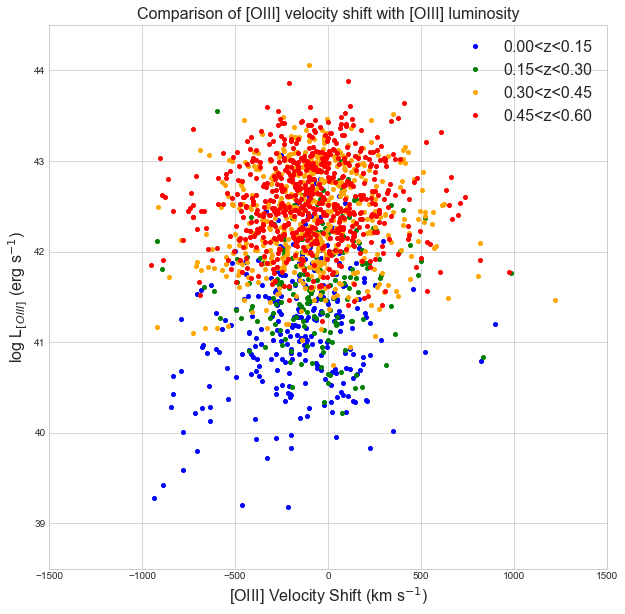

In [39]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))

plt.plot(zbin1_velshift, zbin1_OIII_lum_array, color = 'b', linestyle = '', marker = '.', ms = 8, label = '0.00<z<0.15')
plt.plot(zbin2_velshift, zbin2_OIII_lum_array, color = 'g', linestyle = '', marker = '.', ms = 8, label = '0.15<z<0.30')
plt.plot(zbin3_velshift, zbin3_OIII_lum_array, color = 'orange', linestyle = '', marker = '.', ms = 8, label = '0.30<z<0.45')
plt.plot(zbin4_velshift, zbin4_OIII_lum_array, color = 'red',  linestyle = '', marker = '.', ms = 8, label = '0.45<z<0.60')

plt.xlim(-1500, 1500)
plt.ylim(38.5, 44.5)

plt.title('Comparison of [OIII] velocity shift with [OIII] luminosity', fontsize = 16)
plt.ylabel(r'log L$_{[OIII]}$ (erg s$^{-1}$)', fontsize = 16)
plt.xlabel(r'[OIII] Velocity Shift (km s$^{-1}$)', fontsize = 16)
plt.legend(fontsize = 16)
# plt.savefig('WooEtAl_Fig6_Clone.png')
plt.show()

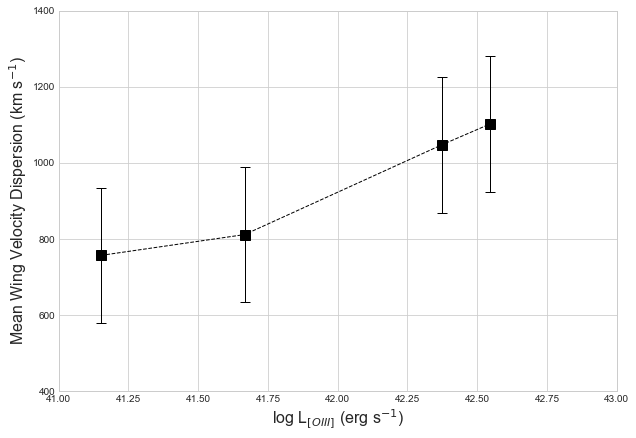

In [18]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,7))

mean_wing_veldis = np.array([np.mean(zbin1_wing_veldis), np.mean(zbin2_wing_veldis), np.mean(zbin3_wing_veldis), np.mean(zbin4_wing_veldis)])
mean_OIII_lum = np.array([np.mean(zbin1_OIII_lum_array), np.mean(zbin2_OIII_lum_array), np.mean(zbin3_OIII_lum_array), np.mean(zbin4_OIII_lum_array)])
std_wing_veldis = np.std([np.mean(zbin1_wing_veldis), np.std(zbin2_wing_veldis), np.std(zbin3_wing_veldis), np.std(zbin4_wing_veldis)])

plt.errorbar(mean_OIII_lum, mean_wing_veldis, std_wing_veldis, color = 'black', linewidth = 1, linestyle = '--', marker = 's', ms = 10, capsize = 5)

plt.ylim(400, 1400)
plt.xlim(41, 43)

plt.xlabel(r'log L$_{[OIII]}$ (erg s$^{-1}$)', fontsize = 16)
plt.ylabel(r'Mean Wing Velocity Dispersion (km s$^{-1}$)', fontsize = 16)

# plt.savefig('MeanWing_veldis_lum.png')

plt.show()

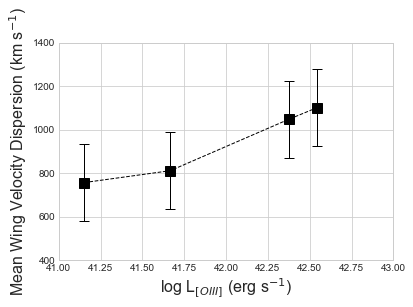

In [19]:
mean_wing_veldis = np.array([np.mean(zbin1_wing_veldis), np.mean(zbin2_wing_veldis), np.mean(zbin3_wing_veldis), np.mean(zbin4_wing_veldis)])
mean_OIII_lum = np.array([np.mean(zbin1_OIII_lum_array), np.mean(zbin2_OIII_lum_array), np.mean(zbin3_OIII_lum_array), np.mean(zbin4_OIII_lum_array)])
std_wing_veldis = np.std([np.mean(zbin1_wing_veldis), np.std(zbin2_wing_veldis), np.std(zbin3_wing_veldis), np.std(zbin4_wing_veldis)])

plt.errorbar(mean_OIII_lum, mean_wing_veldis, std_wing_veldis, color = 'black', linewidth = 1, linestyle = '--', marker = 's', ms = 10, capsize = 5)

plt.ylim(400, 1400)
plt.xlim(41, 43)

plt.xlabel(r'log L$_{[OIII]}$ (erg s$^{-1}$)', fontsize = 16)
plt.ylabel(r'Mean Wing Velocity Dispersion (km s$^{-1}$)', fontsize = 16)

# plt.savefig('MeanWing_veldis_z.png')

plt.show()

In [20]:
wing_count = (zbin1_class[2] + zbin1_class[3]) + (zbin2_class[2] + zbin2_class[3]) + (zbin3_class[2] + zbin3_class[3]) + (zbin4_class[2] + zbin4_class[3])
total_count = len(zbin1_results) + len(zbin2_results) + len(zbin3_results) + len(zbin4_results)
print(100 * wing_count / total_count)

32.41681609882447


In [29]:
zbin1_wing_logveldis = np.log10(zbin1_wing_veldis)
zbin2_wing_logveldis = np.log10(zbin2_wing_veldis)
zbin3_wing_logveldis = np.log10(zbin3_wing_veldis)
zbin4_wing_logveldis = np.log10(zbin4_wing_veldis)

mean_wing_logveldis = np.array([np.mean(zbin1_wing_logveldis), np.mean(zbin2_wing_logveldis), np.mean(zbin3_wing_logveldis), np.mean(zbin4_wing_logveldis)])

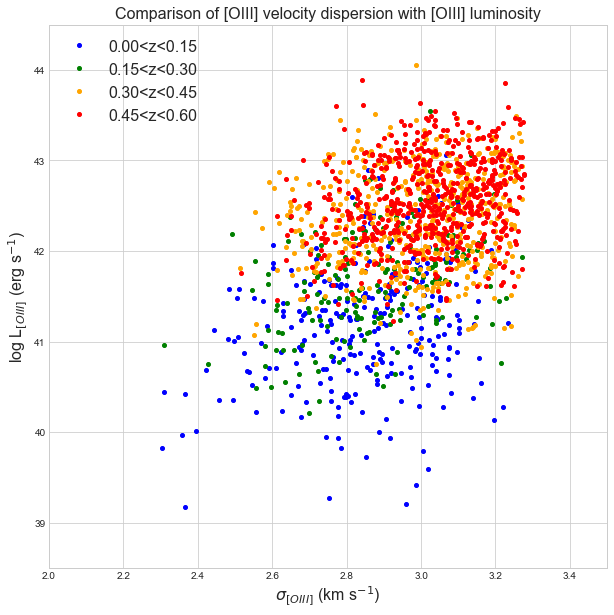

In [41]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))

plt.plot(zbin1_wing_logveldis, zbin1_OIII_lum_array, color = 'b', linestyle = '', marker = '.', ms = 8, label = '0.00<z<0.15')
plt.plot(zbin2_wing_logveldis, zbin2_OIII_lum_array, color = 'g', linestyle = '', marker = '.', ms = 8, label = '0.15<z<0.30')
plt.plot(zbin3_wing_logveldis, zbin3_OIII_lum_array, color = 'orange', linestyle = '', marker = '.', ms = 8, label = '0.30<z<0.45')
plt.plot(zbin4_wing_logveldis, zbin4_OIII_lum_array, color = 'red',  linestyle = '', marker = '.', ms = 8, label = '0.45<z<0.60')

plt.xlim(2, 3.5)
plt.ylim(38.5, 44.5)

plt.title('Comparison of [OIII] velocity dispersion with [OIII] luminosity', fontsize = 16)
plt.ylabel(r'log L$_{[OIII]}$ (erg s$^{-1}$)', fontsize = 16)
plt.xlabel(r'$\sigma$$_{[OIII]}$ (km s$^{-1}$)', fontsize = 16)
plt.legend(fontsize = 16)
# plt.savefig('WooEtAl_Fig6_Clone.png')
plt.show()